In [77]:
# Importar libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest
import numpy as np

1. **Carregar e Visualizar os Dados:**
    - Carregue os dados de irrigação a partir de um arquivo CSV.
    - Visualize os dados para entender a estrutura e as variáveis disponíveis.

In [36]:
df_irrigacao = pd.read_csv('./dataset/dados_de_irrigacao.csv')
df_irrigacao.head()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333


In [37]:
df_irrigacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


---

2. **Análise Exploratória dos Dados (EDA):**
    - Calcule as estatísticas descritivas das variáveis.
    - Crie gráficos de dispersão para visualizar a relação entre as horas de irrigação e a área irrigada por ângulo.
    - Analise a correlação entre as variáveis.

In [38]:
# Estatísticas descritivas
df_irrigacao.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


In [39]:
# Verificando a correlação entre as variáveis
df_irrigacao.corr()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
Horas de Irrigação,1.0,1.0,1.0
Área Irrigada,1.0,1.0,1.0
Área Irrigada por Ângulo,1.0,1.0,1.0


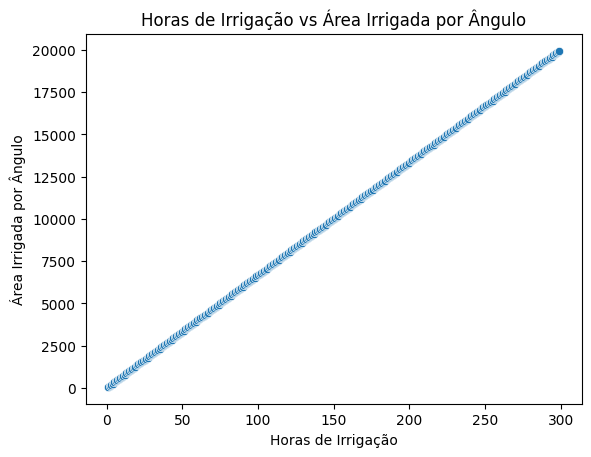

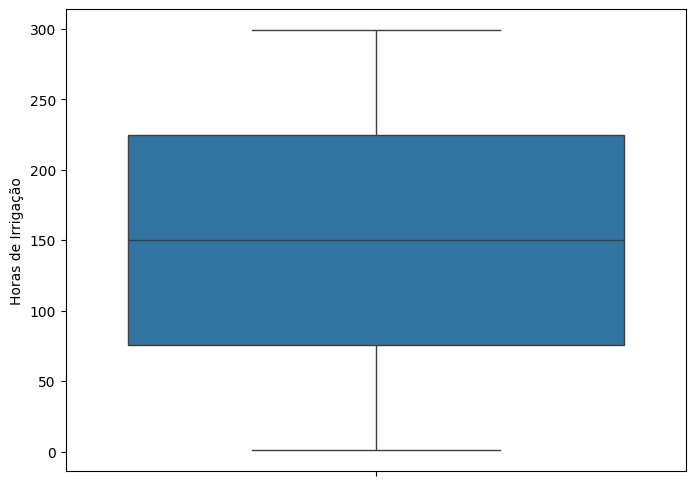

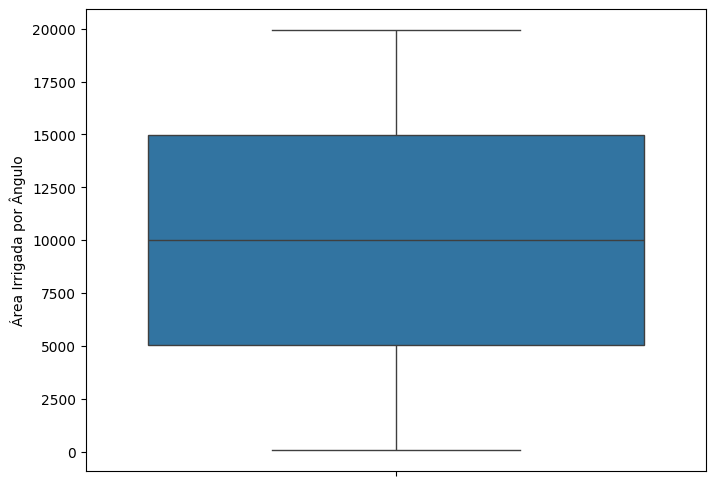

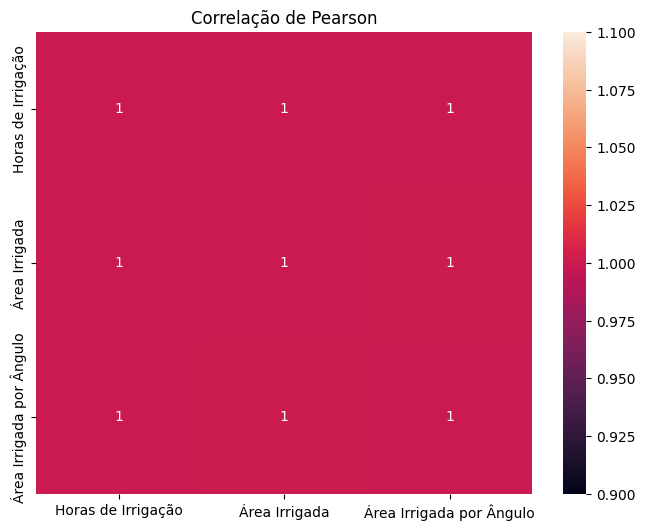

<Figure size 800x600 with 0 Axes>

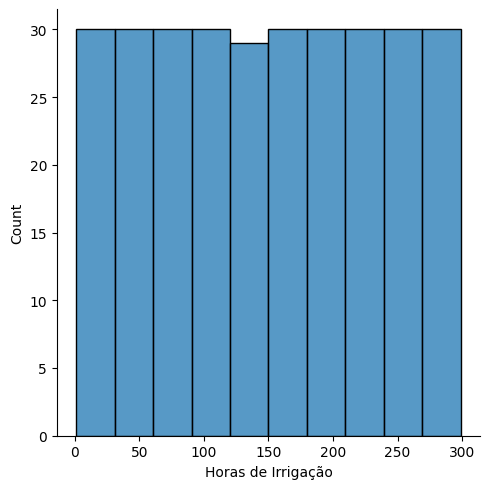

<Figure size 800x600 with 0 Axes>

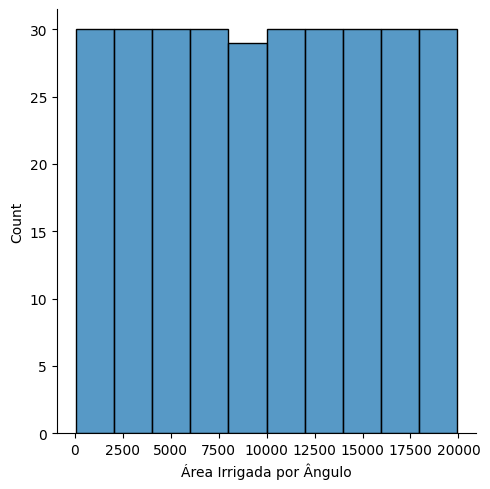

In [34]:
# Criar gráfico de dispersão
sns.scatterplot(data=df_irrigacao, x='Horas de Irrigação', y='Área Irrigada por Ângulo')
plt.title('Horas de Irrigação vs Área Irrigada por Ângulo')
plt.show()

# Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_irrigacao, y='Horas de Irrigação')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_irrigacao, y='Área Irrigada por Ângulo')
plt.show()

# Correlações
plt.figure(figsize=(8, 6))
sns.heatmap(df_irrigacao.corr(method='pearson'), annot=True)
plt.title('Correlação de Pearson')
plt.show()

# Histograma das variáveis
plt.figure(figsize=(8, 6))
sns.displot(df_irrigacao, x='Horas de Irrigação')
plt.show()

plt.figure(figsize=(8, 6))
sns.displot(df_irrigacao, x='Área Irrigada por Ângulo')
plt.show()

---

3. **Construção do Modelo de Regressão Linear:**
    - Divida os dados em conjuntos de treino e teste.
    - Treine um modelo de regressão linear utilizando as horas de irrigação como variável independente (X) e a área irrigada por ângulo como variável dependente (Y).
    - Imprima a equação da reta obtida pelo modelo.

In [55]:
# Dividir os dados em conjuntos de treino e teste
# x='Horas de Irrigação', y='Área Irrigada por Ângulo'

X = df_irrigacao['Horas de Irrigação'].values.reshape(-1, 1)
y = df_irrigacao['Área Irrigada por Ângulo'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [56]:
# Instanciar o modelo de regressão linear
reg_model = LinearRegression()

# Treinar o modelo
reg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
# Imprimir equação da reta
print("A equação da reta é: y= {:4f}x + {}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é: y= 66.666667x + 3.637978807091713e-12


---

4. **Avaliação do Modelo:**
    - Utilize as métricas de desempenho (MSE, MAE) para avaliar a precisão do modelo.
    - Visualize os resultados reais e preditos em um gráfico.

In [59]:
# Predição dos valores
y_pred = reg_model.predict(X_test)

In [61]:
# Avaliação do modelo
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
print("R2: {}".format(r2_score(y_true=y_test, y_pred=y_pred)))
print("MAE: {}".format(mean_absolute_error(y_true=y_test, y_pred=y_pred)))
print("MSE: {}".format(mean_squared_error(y_true=y_test, y_pred=y_pred)))
print("RMSE: {}".format(root_mean_squared_error(y_true=y_test, y_pred=y_pred)))

R2: 1.0
MAE: 1.8764644159495625e-12
MSE: 5.0788674199138044e-24
RMSE: 2.2536342693333814e-12


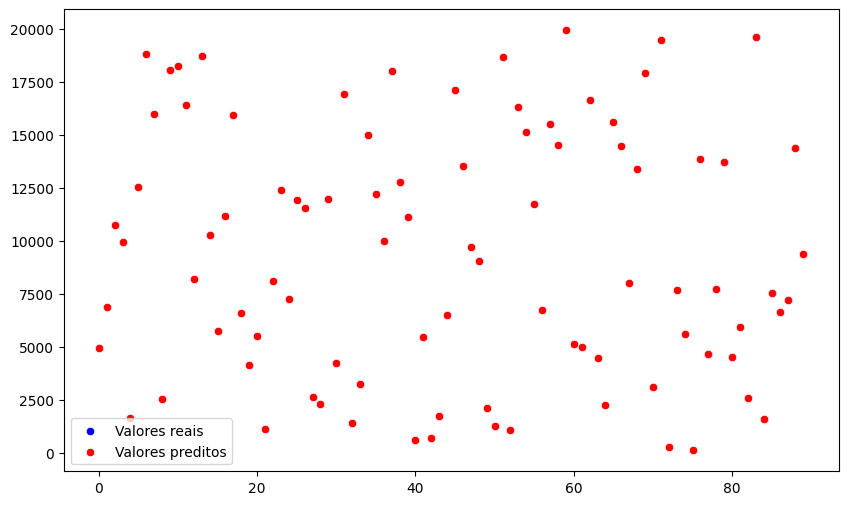

In [62]:
# Visualização gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores preditos')
plt.legend()
plt.show()

---

5. **Análise de Resíduos:**
    - Calcule e analise os resíduos do modelo.
    - Verifique a normalidade dos resíduos utilizando testes estatísticos e gráficos.

In [74]:
# Resíduos são calculados através da subtração do valor real e o valor predito:
residuos = y_test - y_pred

In [66]:
# Padronização dos resíduos ==> Z score
from scipy.stats import zscore
residuos_std = zscore(residuos)

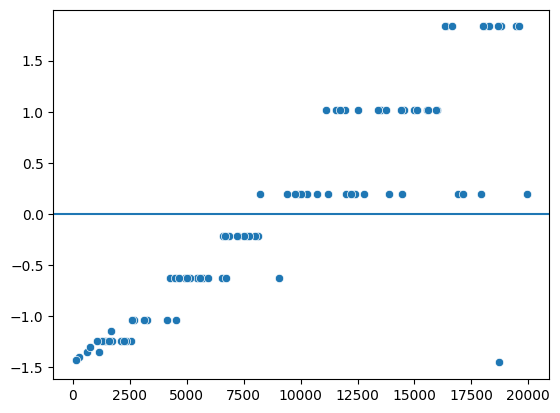

In [68]:
# Verificar linearidade do modelo
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

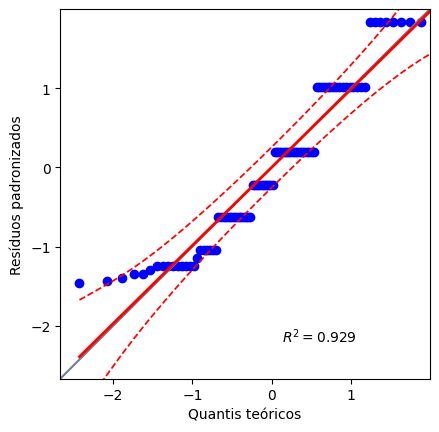

In [69]:
# Checar se os erros seguem uma distribuição normal
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel("Quantis teóricos")
plt.ylabel("Resíduos padronizados")
plt.show()

In [70]:
# Teste de normalidade - Shapiro Wilk
# H0 segue distribuição normal
# H1 - Não segue distribuição normal
# se p-valor <= 0.05 rejeita HO, caso contrário, aceita-se
stat_shapiro, p_value_shapiro =shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e P-Valor: {}".format(stat_shapiro, p_value_shapiro))
print("Rejeita H0? {}".format(p_value_shapiro <= 0.05))

Estatística do teste: 0.9188782351154261 e P-Valor: 3.150814299065697e-05
Rejeita H0? True


In [71]:
# Teste de normalidade - Kolmogorov-Smirnov
# H0 segue distribuição normal
# H1 - Não segue distribuição normal
# se p-valor <= 0.05 rejeita HO, caso contrário, aceita-se
stat_ks, p_value_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste: {} e P-Valor: {}".format(stat_ks, p_value_ks))
print("Rejeita H0? {}".format(p_value_ks <= 0.05))

Estatística do teste: 0.49999999999854866 e P-Valor: 2.4869515023142266e-21
Rejeita H0? True


---
6. **Predições de Exemplo:**
    - Utilize o modelo para fazer predições. Por exemplo, preveja a área irrigada por ângulo para 15 horas de irrigação.

In [88]:
# Exemplo de predição
horas_irrigacao = np.array([[15]])
area_predita = reg_model.predict(horas_irrigacao)
print("Para {} horas de irrigação, a área irrigada por ângulo prevista é: {:4f}".format(horas_irrigacao[0][0], area_predita[0][0]))

Para 15 horas de irrigação, a área irrigada por ângulo prevista é: 1000.000000


### Salvar modelo para uso futuro

In [89]:
import joblib
joblib.dump(reg_model, './model_predict_irrigation_area.pkl')

['./model_predict_irrigation_area.pkl']